In [1]:
# will need firefox-geckodriver system package on Ubuntu

In [2]:
# !pip install selenium

In [3]:
# !pip install imgurpython

In [44]:
from selenium import webdriver
from time import sleep
import os
import datetime
from PIL import Image
import matplotlib.pyplot as plt
import requests

In [23]:
subreddits = {
    'NPB' : 'npb',
    'KBO' : 'kbo',
    'Baltimore Orioles' : 'orioles',
    'Boston Redsox' : 'redsox',
    'New York Yankees' : 'NYYankees',
    'Tampa Bay Rays' : 'tampabayrays',
    'Toronto Blue Jays' : 'torontobluejays',
    'Cleveland Indians' : 'ClevelandIndians',
    'Minnesota Twins' : 'minnesotatwins',
    'Kansas City Royals' : 'KCRoyals',
    'Chicago White Sox' : 'whitesox',
    'Detroit Tigers' : 'motorcitykitties',
    'Houston Astros' : 'Astros',
    'Los Angeles Angels' : 'angelsbaseball',
    'Oakland Athletics' : 'OaklandAthletics',
    'Seattle Mariners' : 'Mariners',
    'Texas Rangers' : 'TexasRangers',
    'Atlanta Braves' : 'Braves',
    'Miami Marlins' : 'letsgofish',
    'New York Mets' : 'NewYorkMets',
    'Philadelphia Phillies' : 'phillies',
    'Washington Nationals' : 'Nationals',
    'Pittsburgh Pirates' : 'buccos',
    'Milwaukee Brewers' : 'Brewers',
    'St. Louis Cardinals' : 'Cardinals',
    'Chicago Cubs' : 'CHICubs',
    'Cincinnati Reds' : 'Reds',
    'Arizona Diamondbacks' : 'azdiamondbacks',
    'Los Angeles Dodgers' : 'Dodgers',
    'San Francsisco Giants' : 'SFGiants',
    'Colorado Rockies' : 'ColoradoRockies',
    'San Diego Padres' : 'Padres'
}

In [24]:
subreddits = dict(sorted(subreddits.items()))

In [25]:
# should be 30 teams
len(subreddits)

32

In [26]:
# initialize the driver
# set some options

fp = webdriver.FirefoxProfile()
fp.set_preference("browser.download.folderList", 2)
fp.set_preference("browser.download.dir", os.getcwd())
fp.set_preference("browser.helperApps.neverAsk.saveToDisk", "application/octet-stream")

firefox_options= webdriver.FirefoxOptions()
firefox_options.add_argument("--headless")
firefox_options.add_argument("--height=1400")
firefox_options.add_argument("--width=1300")

In [27]:
def prepare_snapshot(team, subreddit):
    """ navigates to top post of the week for subreddit and produces screenshot {team}.jph
    """
    
    driver.get(f"http://old.reddit.com/r/{subreddit}/top/?sort=top&t=week")
    top_link = driver.find_element_by_class_name('thing').get_attribute("data-permalink")
    driver.get(f"http://old.reddit.com{top_link}")
    # remove side bar
    element = driver.find_element_by_class_name('side')
    driver.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element)
    """, element)

    # remove listingsignupbar
    element = driver.find_element_by_class_name('listingsignupbar')
    driver.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element)
    """, element)

    # remove commentsignupbar
    element = driver.find_element_by_class_name('commentsignupbar')
    driver.execute_script("""
    var element = arguments[0];
    element.parentNode.removeChild(element)
    """, element)
    
    # expand image/video if one is there
    try:
        driver.find_element_by_css_selector('.expando-button.collapsed').click()
    except:
        pass
    
    # expand the content element
    element = driver.find_element_by_css_selector('.content')
    driver.execute_script("""
    var element = arguments[0];
    element.style.marginLeft = '35px'
    """, element)
    
    
    sleep(3)
    
    img_path = f"{team}.png"

    driver.save_screenshot(img_path)
    
    img = Image.open(img_path)
    crop_area = (0,0, 1000, 1300)
    img_crop = img.crop(crop_area)
    img_crop.save(img_path)
    
    return f"https://np.reddit.com{top_link}"

In [28]:
driver = webdriver.Firefox(options=firefox_options, firefox_profile=fp)

links = [ prepare_snapshot(team, subreddit) for team, subreddit in subreddits.items() ]
# prepare_snapshot("bal test", "orioles")

In [29]:
driver.close()

# select a sub to feature here

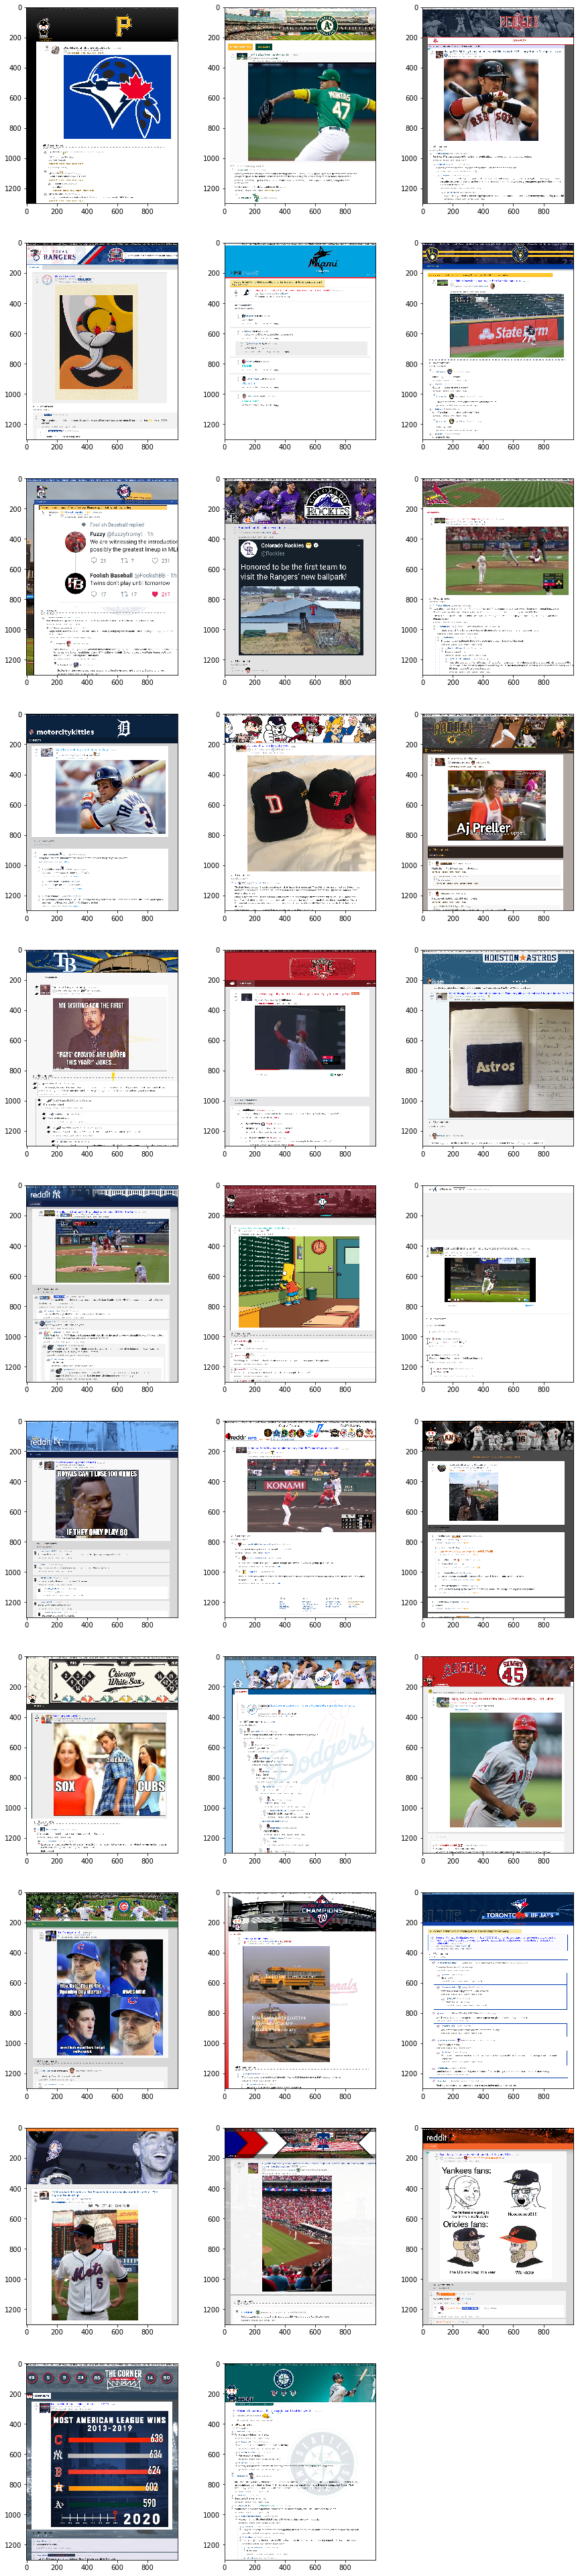

In [30]:
# show me the images
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(15,70))
columns = 3
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

## stop here ##

In [31]:
feat_team = 'Philadelphia Phillies'
feat_sub = subreddits[feat_team]
feat_idx = [idx for idx, team in enumerate(subreddits) if team == feat_team][0]
feat_link = links[feat_idx]

In [32]:
feat_team, feat_sub, feat_link

('Philadelphia Phillies',
 'phillies',
 'https://np.reddit.com/r/phillies/comments/hvaq8t/8_years_ago_today_cole_hamels_threw_a_career_high/')

In [33]:
# remove feature from the list
subreddits.pop(feat_team)
del links[feat_idx]

In [34]:
subreddits

{'Arizona Diamondbacks': 'azdiamondbacks',
 'Atlanta Braves': 'Braves',
 'Baltimore Orioles': 'orioles',
 'Boston Redsox': 'redsox',
 'Chicago Cubs': 'CHICubs',
 'Chicago White Sox': 'whitesox',
 'Cincinnati Reds': 'Reds',
 'Cleveland Indians': 'ClevelandIndians',
 'Colorado Rockies': 'ColoradoRockies',
 'Detroit Tigers': 'motorcitykitties',
 'Houston Astros': 'Astros',
 'KBO': 'kbo',
 'Kansas City Royals': 'KCRoyals',
 'Los Angeles Angels': 'angelsbaseball',
 'Los Angeles Dodgers': 'Dodgers',
 'Miami Marlins': 'letsgofish',
 'Milwaukee Brewers': 'Brewers',
 'Minnesota Twins': 'minnesotatwins',
 'NPB': 'npb',
 'New York Mets': 'NewYorkMets',
 'New York Yankees': 'NYYankees',
 'Oakland Athletics': 'OaklandAthletics',
 'Pittsburgh Pirates': 'buccos',
 'San Diego Padres': 'Padres',
 'San Francsisco Giants': 'SFGiants',
 'Seattle Mariners': 'Mariners',
 'St. Louis Cardinals': 'Cardinals',
 'Tampa Bay Rays': 'tampabayrays',
 'Texas Rangers': 'TexasRangers',
 'Toronto Blue Jays': 'torontoblu

In [61]:
import json
import base64

In [49]:
client_id = 'dd6f501b4b49c74'

headers = {
    'Authorization' : f'Client-ID {client_id}'
}

In [77]:
def upload_imgur_image(image_path, name=None, title=None, description=None, album=None):
    
    print(f"Uploading {image_path}")
    
    with open(image_path, "rb") as image_file:
        image64 = base64.b64encode(image_file.read())
        
    payload = {
        'image': image64,
        'album' : album,
        'name' : name,
        'title' : title,
        'description' : description
    }

    response = requests.post('https://api.imgur.com/3/image',data=payload, headers=headers)
    print("Done")
    return json.loads(response.text.encode('utf8')['data'])

In [83]:
def create_imgur_album(title=None, description=None):
    config = {
        'title': title,
        'description': description,
    }
    response = requests.post("https://api.imgur.com/3/album", headers=headers)
    return json.loads(response.text.encode('utf8'))['data']

In [84]:
# al = create_imgur_album(title="test album")

In [85]:
# test = upload_imgur_image('Detroit Tigers.png', 
#                           name="Tigers", 
#                           title="t", 
#                           description="test test", 
#                           album=al['deletehash'])

Uploading Detroit Tigers.png
Done


In [87]:
############ only run this when ready##########

album = create_imgur_album(title=f"State of the Baseball Subreddits {datetime.date.today()}")
print(album["id"], album["deletehash"])
upload_imgur_image(f"{feat_team}.png", name="feat_sub", title=f"This week's Featured Sub: {feat_team}", description=f"{feat_link}", album = album['deletehash'])
for team, sub, link in zip(subreddits.keys(),subreddits.values(),links):
    upload_imgur_image(f"{team}.png", name=sub, title=team, description=f"{link}", album = album['deletehash'])

Sy290IF 41SFaoK6u5FzTHp
Uploading Philadelphia Phillies.png
Done
Uploading Arizona Diamondbacks.png
Done
Uploading Atlanta Braves.png
Done
Uploading Baltimore Orioles.png
Done
Uploading Boston Redsox.png
Done
Uploading Chicago Cubs.png
Done
Uploading Chicago White Sox.png
Done
Uploading Cincinnati Reds.png
Done
Uploading Cleveland Indians.png
Done
Uploading Colorado Rockies.png
Done
Uploading Detroit Tigers.png
Done
Uploading Houston Astros.png
Done
Uploading KBO.png
Done
Uploading Kansas City Royals.png
Done
Uploading Los Angeles Angels.png
Done
Uploading Los Angeles Dodgers.png
Done
Uploading Miami Marlins.png
Done
Uploading Milwaukee Brewers.png
Done
Uploading Minnesota Twins.png
Done
Uploading NPB.png
Done
Uploading New York Mets.png
Done
Uploading New York Yankees.png
Done
Uploading Oakland Athletics.png
Done
Uploading Pittsburgh Pirates.png
Done
Uploading San Diego Padres.png
Done
Uploading San Francsisco Giants.png
Done
Uploading Seattle Mariners.png
Done
Uploading St. Louis Car

In [88]:
album

{'id': 'Sy290IF', 'deletehash': '41SFaoK6u5FzTHp'}

In [ ]:
album

In [ ]:
!pip install -U imgurpython